Polynomial regression with tensorflow

200 randomly generated data

learning rate : 0.01

train : 10 times

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


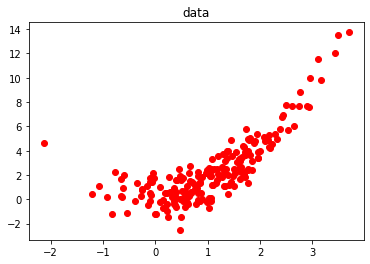

In [2]:
import tensorflow as tf
import numpy as np
import random as random
import matplotlib.pyplot as plt

num_points = 200
x = []
y = []

for i in range(num_points):
    temp_x = np.random.normal(1.0, 1)
    # noise
    temp_y = temp_x ** 2 + 0.1 * temp_x + 0.3 + np.random.normal(0.0, 1.0)
    x.append(temp_x)
    y.append(temp_y)

# check data
plt.plot(x, y, 'ro')
plt.title('data')
plt.show()

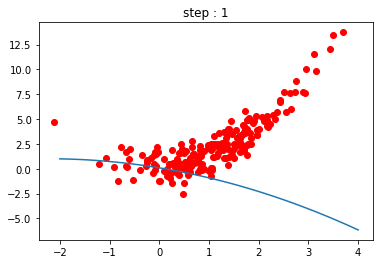

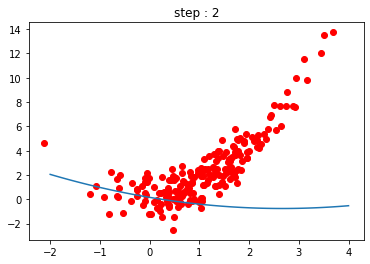

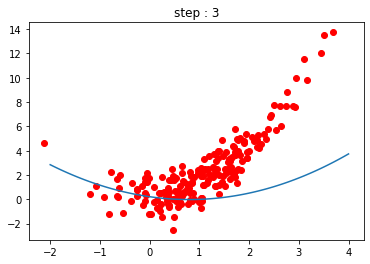

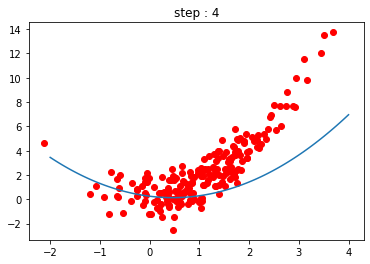

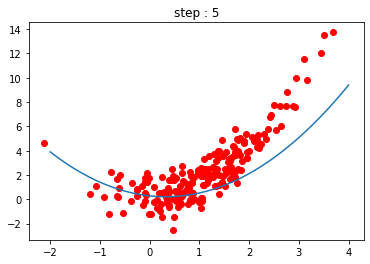

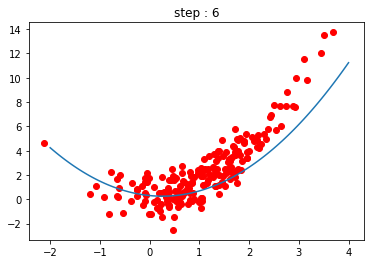

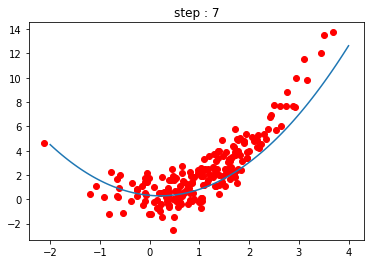

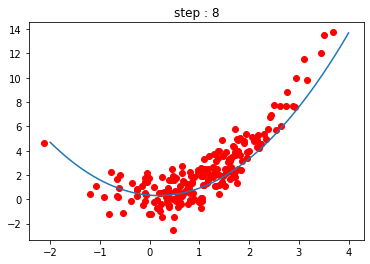

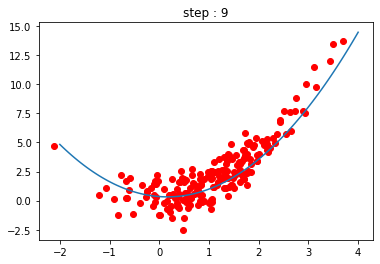

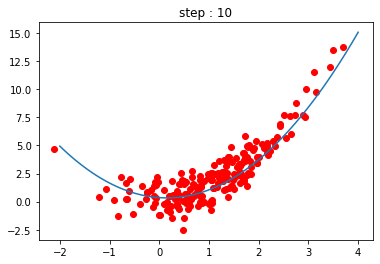

In [5]:
# parameters to optimize
W1 = tf.Variable([-0.6])
W2 = tf.Variable([-1.0])
b = tf.Variable(tf.zeros([1]))

# make loss function : MSE(mean square error)
loss = 0
for i in range(num_points):
  y_pred = W1 * (x[i] ** 2) + W2 * x[i] + b
  loss += (y[i] - y_pred)**2
loss = loss/num_points


# set optimizer with learning rate(0.01)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)
init = tf.global_variables_initializer()

# make session
sess = tf.Session()
sess.run(init)

W1_list = []
W2_list = []
b_list = []
loss_list = []
x_ = np.linspace(-2,4,100)

# training
for step in range(10):
  sess.run(train)

  # check data and model
  plt.plot(x, y, 'ro')
  y_ = sess.run(W1).item() * x_**2 + sess.run(W2).item() * x_ + sess.run(b).item()
  plt.plot(x_, y_)
  plt.title('step : ' + str(step + 1))
  plt.show()

  # store W, b, loss data
  W1_list.append(sess.run(W1).item())
  W2_list.append(sess.run(W2).item())
  b_list.append(sess.run(b).item())
  loss_list.append(sess.run(loss).item())

W1 :  [-0.18501536548137665, 0.1288132667541504, 0.36608442664146423, 0.5454154014587402, 0.6808967590332031, 0.7831927537918091, 0.8603747487068176, 0.9185513854026794, 0.962346076965332, 0.9952579736709595]
W2 :  [-0.8222284913063049, -0.6871483325958252, -0.5843827724456787, -0.5060781836509705, -0.4462904930114746, -0.400520920753479, -0.36536455154418945, -0.33824434876441956, -0.31720981001853943, -0.300784707069397]
b :  [0.09238263964653015, 0.16242389380931854, 0.21555262804031372, 0.25587770342826843, 0.2865090072154999, 0.30980023741722107, 0.32753291726112366, 0.34105539321899414, 0.35138821601867676, 0.35930386185646057]
loss :  [26.115541458129883, 15.4302396774292, 9.309211730957031, 5.802702903747559, 3.793846607208252, 2.6428802013397217, 1.9833347797393799, 1.6052900552749634, 1.3884974718093872, 1.264078140258789]


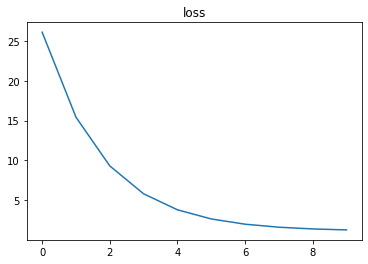

In [7]:
# check training procedure

print("W1 : ", W1_list)
print("W2 : ", W2_list)
print("b : ", b_list)
print("loss : ", loss_list)
plt.plot(loss_list)
plt.title('loss')
plt.show()